# ENDTERM Used Car Pricing Exploratory Dataset Analysis <hr style="border:2.5px solid rgb(134, 72, 72)"></hr>


Name: <b>Geo Angelo D. Butas</b> <br> 
Section: <b>CPE2A</b>

Import **pandas**,**numpy** and **matplotlib** library

In [885]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Overview of the Dataset

In [886]:
df = pd.read_csv("dataset/car_price_dataset.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   9902 non-null   float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       9879 non-null   float64
 7   Doors         10000 non-null  int64  
 8   Owner_Count   9882 non-null   float64
 9   Price         10000 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


In [887]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944.0,3,5.0,14877
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356.0,2,3.0,21161
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440.0,4,2.0,19549
3,Audi,Q5,2023,2.0,Electric,Manual,160971.0,2,1.0,20615
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618.0,3,3.0,5017


Dropping doors

In [888]:
df = df.drop(df.columns[7],axis=1)
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944.0,5.0,14877
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356.0,3.0,21161
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440.0,2.0,19549
3,Audi,Q5,2023,2.0,Electric,Manual,160971.0,1.0,20615
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618.0,3.0,5017


Creating a duplicate dataframe for later uses

In [889]:
df_w = df

Checking no. of NaN Values

In [890]:
df_w.isna().sum()

Brand             0
Model             0
Year              0
Engine_Size      98
Fuel_Type         0
Transmission      0
Mileage         121
Owner_Count     118
Price             0
dtype: int64

# Cleaning NaN values

In [891]:
df_n = df_w.copy()

### Outlier Analysis

In [892]:
Q1 = df[['Mileage', 'Price']].quantile(0.25)  
Q3 = df[['Mileage', 'Price']].quantile(0.75)
IQR = Q3 - Q1

Defining lower and upper bounds to identify outliers

In [893]:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[['Mileage', 'Price']] < lower_bound) | (df[['Mileage', 'Price']] > upper_bound)).sum()
outliers


Mileage    0
Price      6
dtype: int64

In [894]:
df_cleaned = df_w[(df_w['Price'] >= lower_bound['Price']) & (df['Price'] <= upper_bound['Price'])]

In [895]:
df_cleaned.shape

(9994, 9)

### Cleaning Owner Count

Create median based by year

In [896]:
owner_count_median = df_n.groupby(['Year'])['Owner_Count'].transform('median')
print(owner_count_median)


0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
9995    3.0
9996    3.0
9997    3.0
9998    3.0
9999    3.0
Name: Owner_Count, Length: 10000, dtype: float64


Checking no. of unique values

In [897]:
owner_count_median.unique()

array([3.])

Every car from every year of release, seemingly has an average of 3 previous owners.

Replace NaN values with median

In [898]:
df_n['Owner_Count'] = df_n['Owner_Count'].fillna(owner_count_median)

df_n.isna().sum()

Brand             0
Model             0
Year              0
Engine_Size      98
Fuel_Type         0
Transmission      0
Mileage         121
Owner_Count       0
Price             0
dtype: int64

### Cleaning Mileage

Create median by owner count and year

In [899]:
mileage_median= df_n.groupby(['Owner_Count', 'Year'])['Mileage'].transform('median')
print(mileage_median)


0       149965.0
1       142183.5
2       148182.5
3       142491.0
4       160973.0
          ...   
9995    139871.0
9996    172993.0
9997    144699.5
9998    172993.0
9999    144877.5
Name: Mileage, Length: 10000, dtype: float64


Replace NaN values with mean of that specific car model

In [900]:
df_n['Mileage'] = df_n['Mileage'].fillna(mileage_median)

df_n.isna().sum()

Brand            0
Model            0
Year             0
Engine_Size     98
Fuel_Type        0
Transmission     0
Mileage          0
Owner_Count      0
Price            0
dtype: int64

### Cleaning Engine Size Values

Cleaned by car model since they will typically have the same specifications.

Create mean for each type of car model

In [901]:
engine_size_median = df_n.groupby('Model')['Engine_Size'].transform('median')
print(engine_size_median)


0       3.30
1       3.00
2       3.05
3       3.10
4       3.00
        ... 
9995    3.00
9996    3.00
9997    3.00
9998    3.00
9999    3.00
Name: Engine_Size, Length: 10000, dtype: float64


Rounding values to the first decimal

In [902]:
engine_size_median = engine_size_median.round(1)

Replace NaN values with median of that specific car model

In [903]:
df_n['Engine_Size'] = df_n['Engine_Size'].fillna(engine_size_median)

df_n.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Owner_Count     0
Price           0
dtype: int64

# Data Analysis

In [904]:
df_a = df_n


## Distribution of Data

### Fuel Type

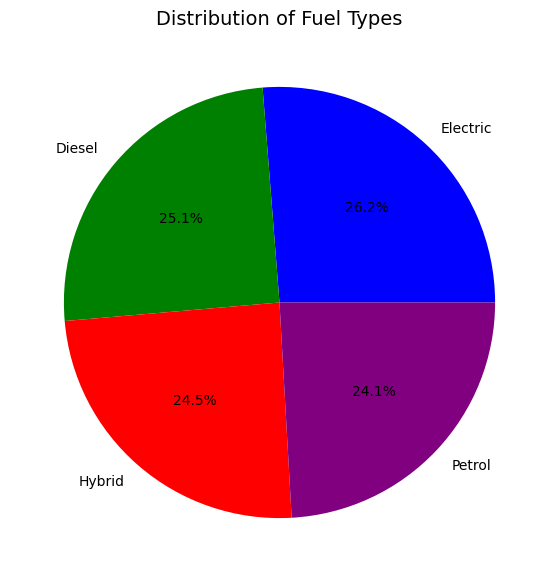

In [905]:


plt.figure(figsize=(7, 7))
fuel_counts = df['Fuel_Type'].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', colors=["blue", "green", "red", "purple"])
plt.title("Distribution of Fuel Types", fontsize=14)
plt.show()



### Transmission Type

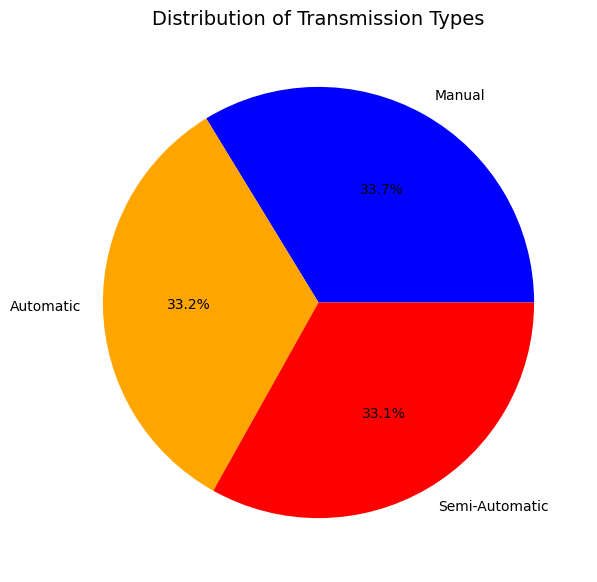

In [906]:
plt.figure(figsize=(7, 7))
transmission_counts = df['Transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', colors=["blue", "orange", "red"])
plt.title("Distribution of Transmission Types", fontsize=14)
plt.show()

### Car Brands

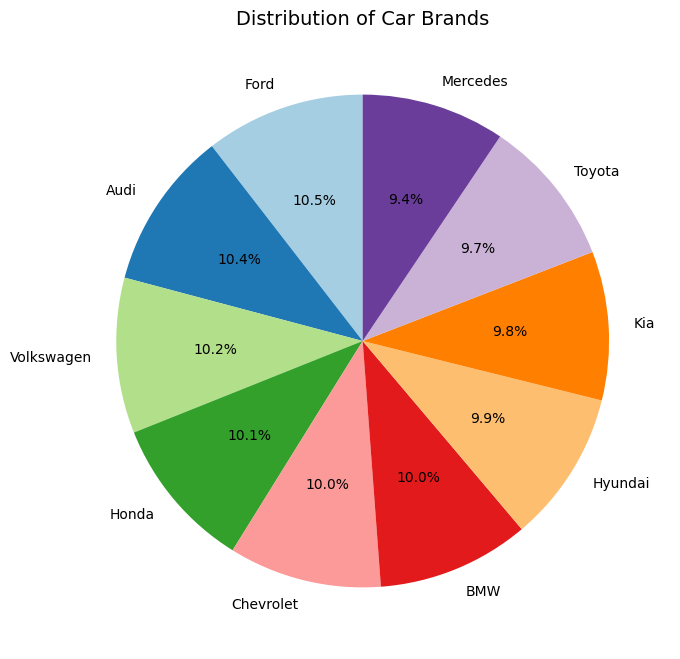

In [907]:
brand_counts = df_a['Brand'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.title('Distribution of Car Brands', fontsize=14)
plt.show()


### Mileage Distribution

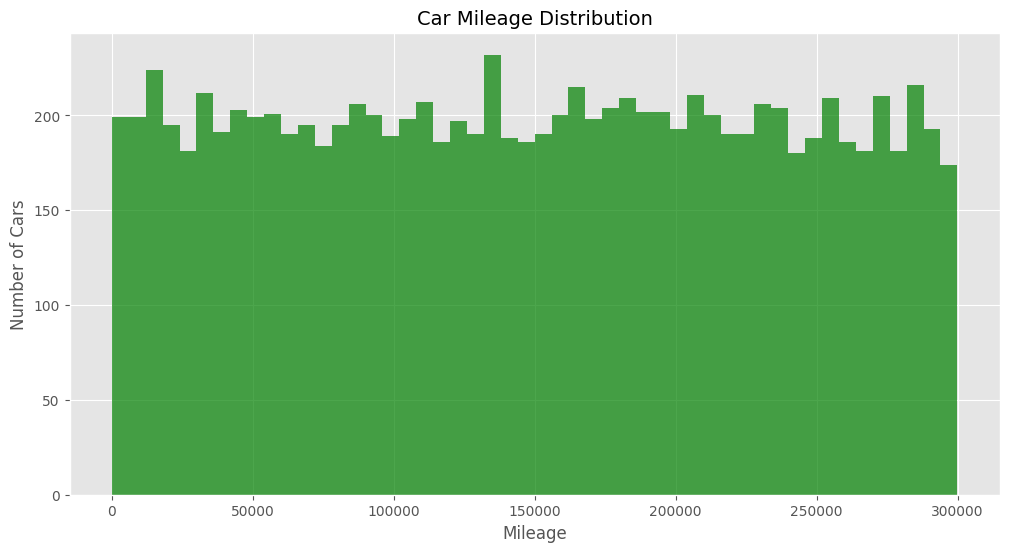

In [909]:
plt.figure(figsize=(12, 6))
plt.hist(df['Mileage'], bins=50, color='green', alpha=0.7, label='Mileage Histogram')
plt.title("Car Mileage Distribution", fontsize=14)
plt.xlabel("Mileage")
plt.ylabel("Number of Cars")
plt.show()


### Price Distribution

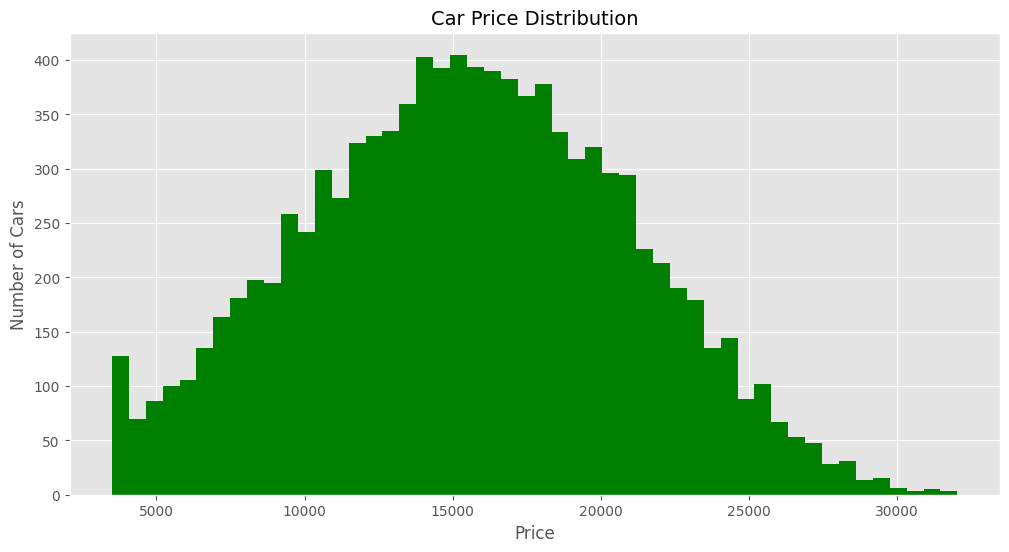

In [910]:
plt.figure(figsize=(12, 6))
plt.hist(df['Price'], bins=50, color='green', alpha=1)
plt.title("Car Price Distribution", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Number of Cars")
plt.show()


## Relation of Price to other Variables

### Top 7 Brands By Price Mean

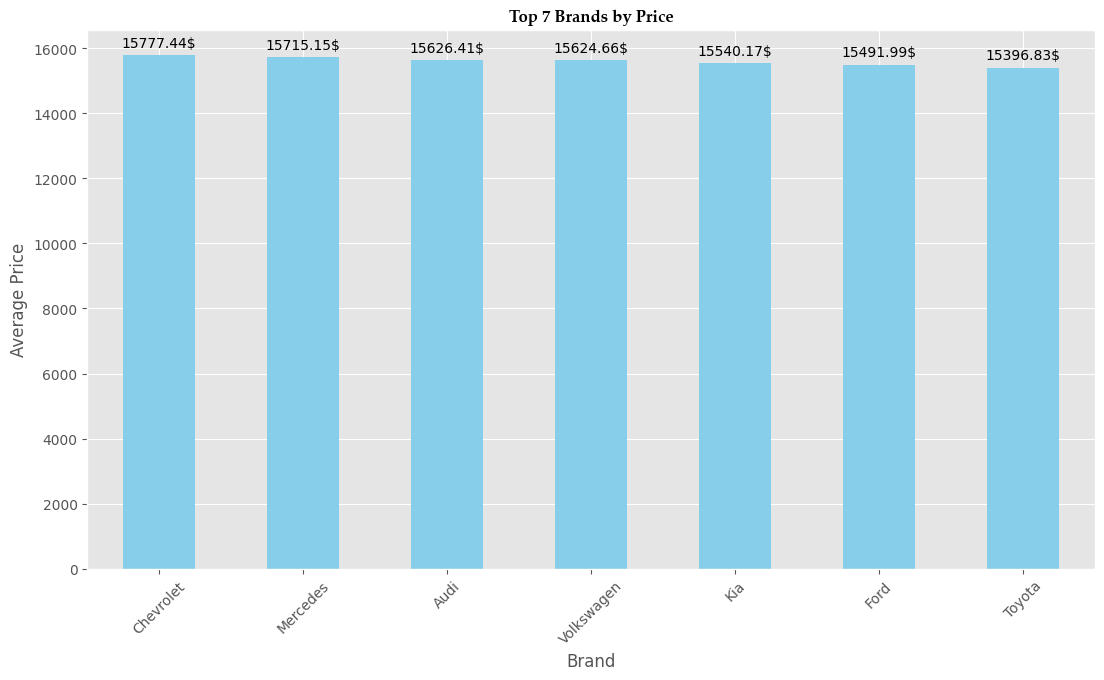

In [911]:
top_brands = df_a.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(7)

plt.figure(figsize=(13,7))
ax = top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 7 Brands by Price',
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Average Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}' + '$', 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 9), textcoords='offset points')

plt.show()


### Top 7 Models by Price Mean

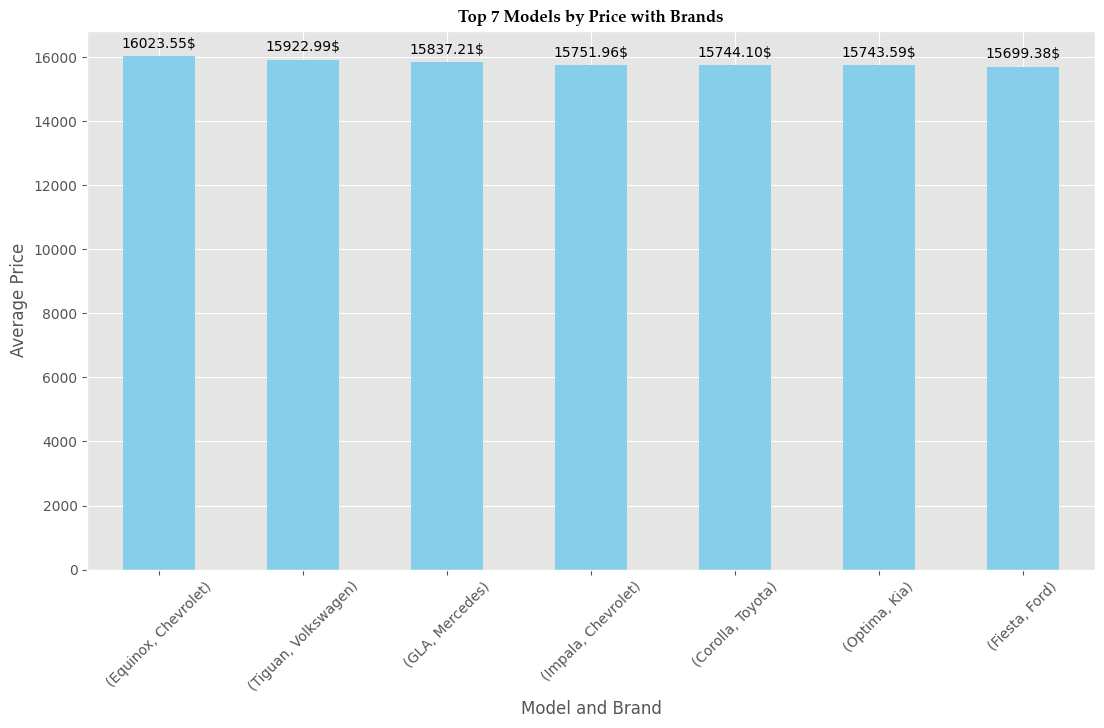

In [912]:
top_models = df_a.groupby(['Model', 'Brand'])['Price'].mean().sort_values(ascending=False).head(7)

plt.figure(figsize=(13,7))
ax = top_models.plot(kind='bar', color='skyblue')
plt.title('Top 7 Models by Price with Brands',
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Average Price')
plt.xlabel('Model and Brand')
plt.xticks(rotation=45)
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}' + '$', 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 9), textcoords='offset points')

plt.show()


### Fuel Type and Average Price

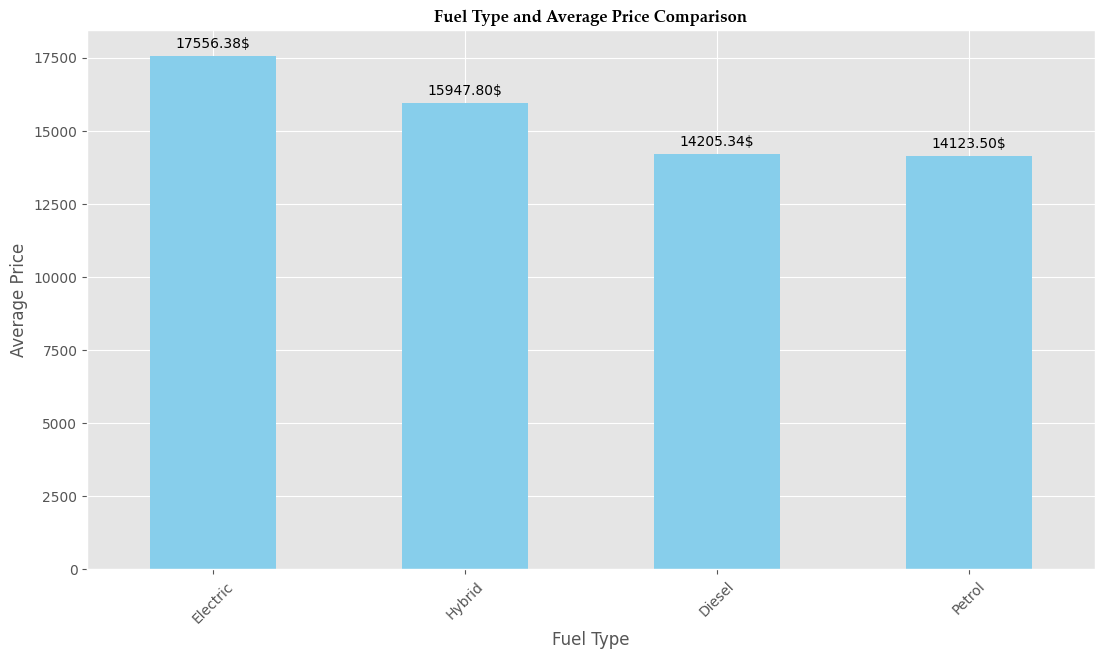

In [913]:

fuel_type_price = df_a.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(13,7))
ax = fuel_type_price.plot(kind='bar', color='skyblue')
plt.title('Fuel Type and Average Price Comparison',
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Average Price')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}' + '$', 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 9), textcoords='offset points')

plt.show()


### Tranmission Type and Average Price

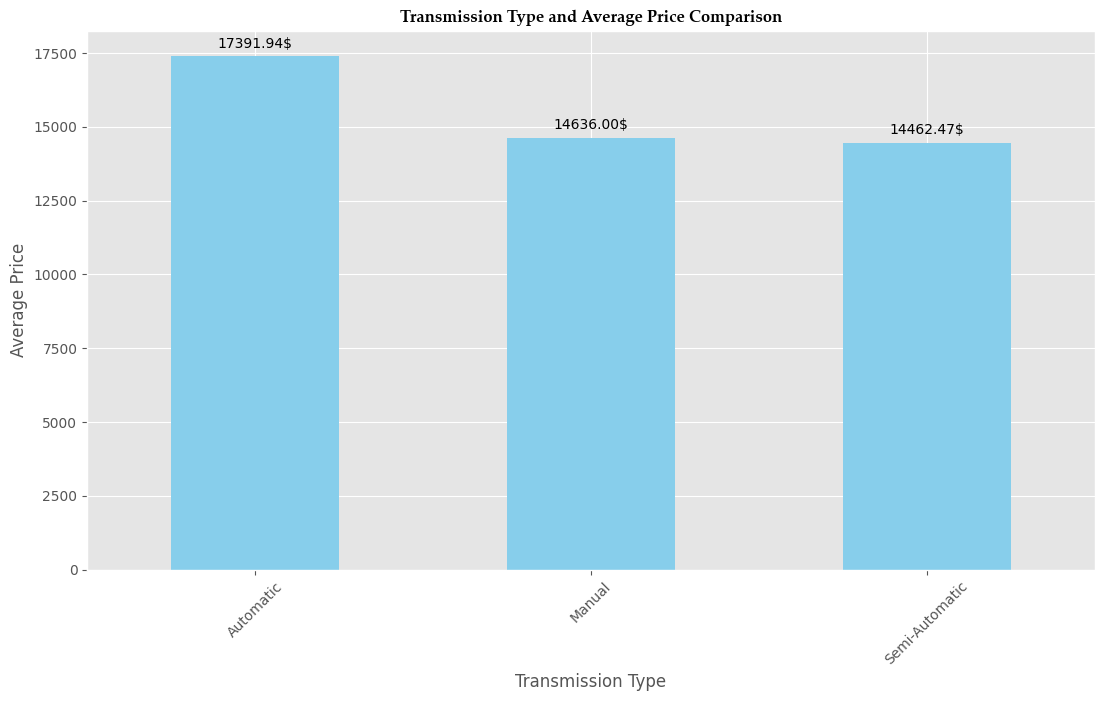

In [914]:
transmission_price = df_a.groupby('Transmission')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(13,7))
ax = transmission_price.plot(kind='bar', color='skyblue')
plt.title('Transmission Type and Average Price Comparison',
          fontfamily='Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Average Price')
plt.xlabel('Transmission Type')
plt.xticks(rotation=45)
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}' + '$', 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 9), textcoords='offset points')

plt.show()


### Trend of Pricing in relation to Mileage

Scatterplot of Prices and Mileage

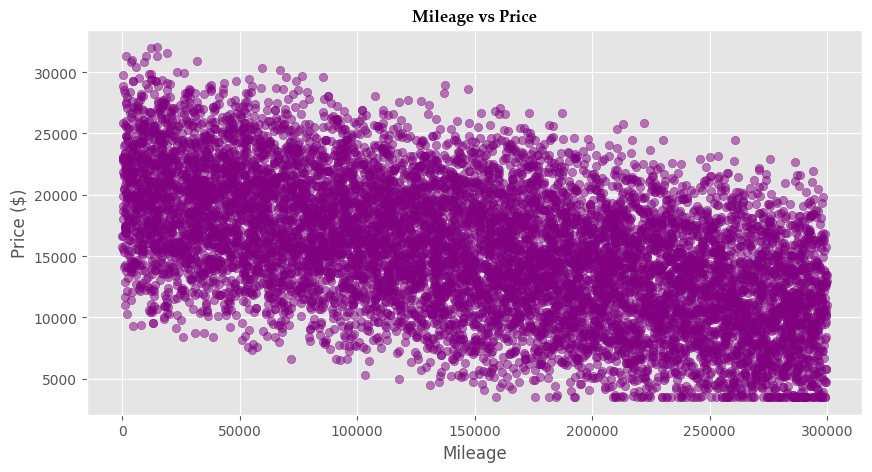

In [915]:
plt.figure(figsize=(10, 5))
plt.scatter(df_a['Mileage'], df_a['Price'], color='purple', alpha=0.5)
plt.title('Mileage vs Price', fontfamily='Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.show()


Using a 2nd-degree polynomial (quadratic fit) to see the general trend

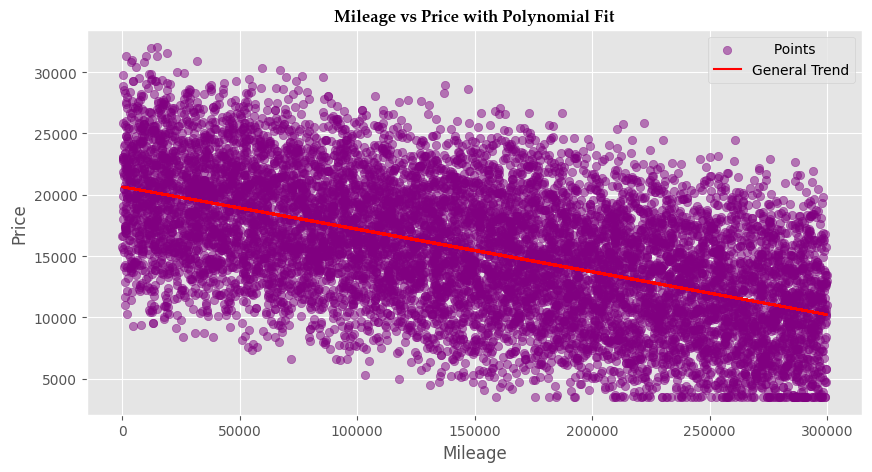

In [916]:

z = np.polyfit(df_a['Mileage'], df_a['Price'], 2) 
p = np.poly1d(z)
plt.figure(figsize=(10, 5))
plt.scatter(df_a['Mileage'], df_a['Price'], color='purple', alpha=0.5, label='     Points')
plt.plot(df_a['Mileage'], p(df_a['Mileage']), color='red', label='General Trend')
plt.title('Mileage vs Price with Polynomial Fit', fontfamily='Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()


### Trend of Pricing in relation to Engine Size

Scatterplot and Generalized Trend using Polynomial Fit

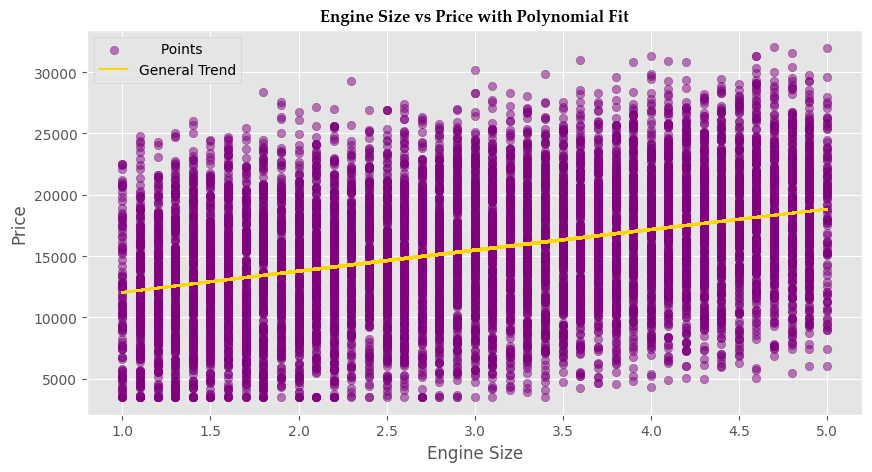

In [917]:
s = np.polyfit(df_a['Engine_Size'], df_a['Price'], 2)  
t = np.poly1d(s)
plt.figure(figsize=(10, 5))
plt.scatter(df_a['Engine_Size'], df_a['Price'], color='purple', alpha=0.5, label='     Points')
plt.plot(df_a['Engine_Size'], t(df_a['Engine_Size']), color='gold', label='General Trend') 
plt.title('Engine Size vs Price with Polynomial Fit', fontfamily='Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()


General Trend (For better visibility)

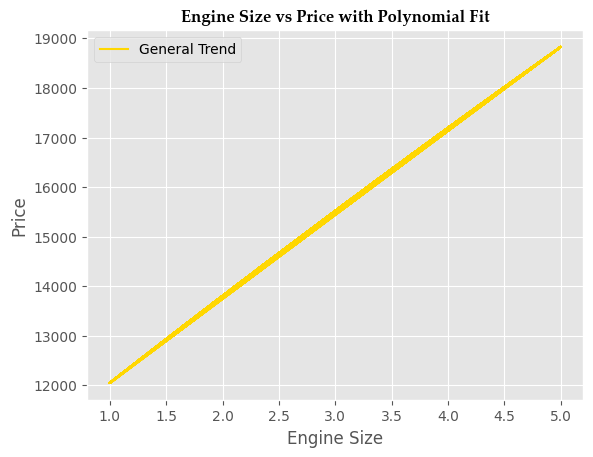

In [918]:
plt.plot(df_a['Engine_Size'], t(df_a['Engine_Size']), color='gold', label='General Trend')  # Use 't' here instead of 'p'
plt.title('Engine Size vs Price with Polynomial Fit', fontfamily='Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

### Price in relation to production year

 Group by Year and calculate the mean Price for each Year

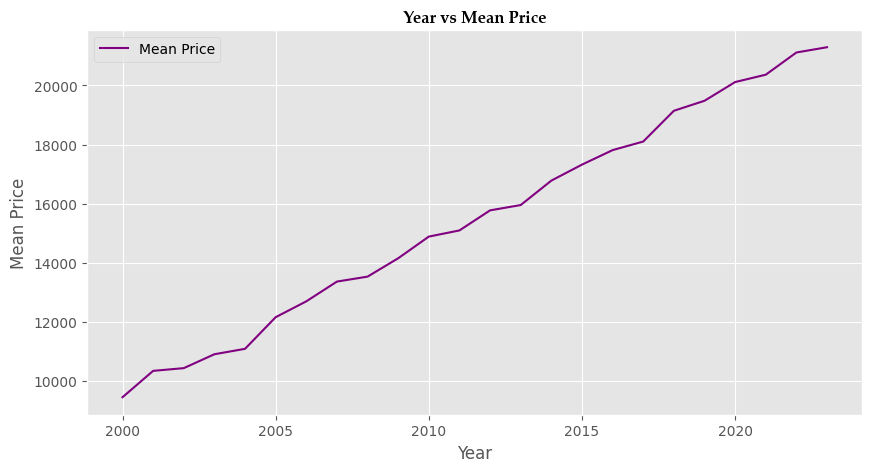

In [919]:

mean_price_by_year = df_a.groupby('Year')['Price'].mean()

plt.figure(figsize=(10, 5))
plt.plot(mean_price_by_year.index, mean_price_by_year.values, color='purple', label='Mean Price')
plt.title('Year vs Mean Price', fontfamily='Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()


### Price in relation to Owner Count

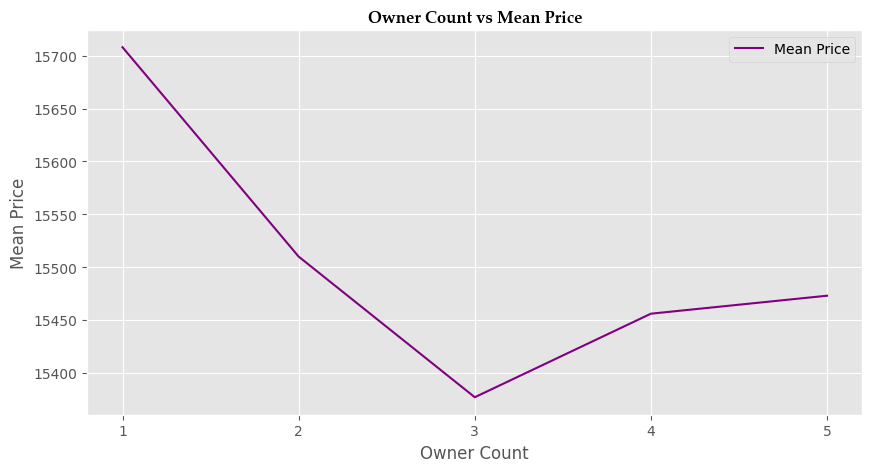

In [920]:
median_price_by_owner_count = df_a.groupby('Owner_Count')['Price'].median()
plt.figure(figsize=(10, 5))
plt.plot(median_price_by_owner_count.index, median_price_by_owner_count.values, color='purple', label='Mean Price')
plt.title('Owner Count vs Mean Price', fontfamily='Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('Owner Count')
plt.ylabel('Mean Price')
plt.xticks(np.arange(min(median_price_by_owner_count.index), max(median_price_by_owner_count.index) + 1, 1))
plt.grid(True)
plt.legend()

plt.show()


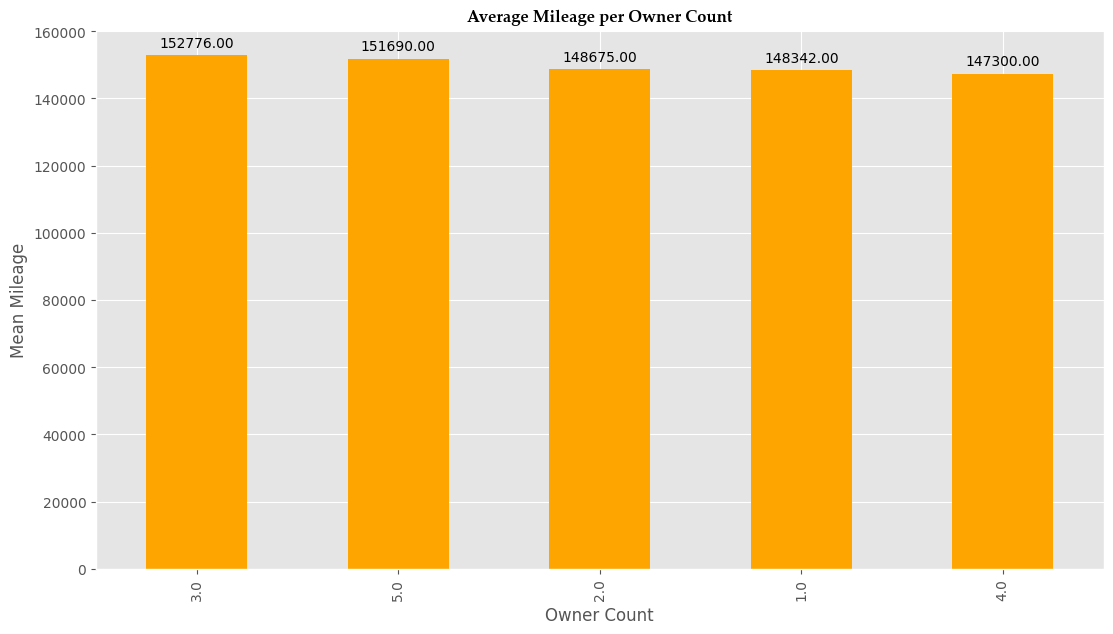

In [921]:
mileage_mean_per_owner = df_a.groupby('Owner_Count')['Mileage'].median().sort_values(ascending=False)

plt.figure(figsize=(13,7))
ax = mileage_mean_per_owner.plot(kind='bar', color='orange')

plt.title('Average Mileage per Owner Count', fontfamily='Palatino Linotype', fontsize=12, fontweight='bold')
plt.ylabel('Mean Mileage')
plt.xlabel('Owner Count')

for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}', 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 9), textcoords='offset points')

plt.show()


# Findings

<b>Brands </b><br/>
The brand, the company that produced the car model, has little impact on the price given the data. All brands have similar price means. <br/>

<b>Models</b><br/>
Similar to branding, while the average price of some models are higher than the others, they are not drastically different. The most expensive car model by price mean is the Chevrolet Equinox. <br/>

<b>Fuel Type </b><br/>
Fuel Types are relevant to pricing, as electric and hybrid cars have higher average prices compared to diesel and petrol. <br/>

<b>Transmission Type </b><br/>
Transmission Types show that on average, automatic cars are generally more expensive than semi-automatics and manual. Notably, semi-automatics and manuals have very little difference in their average pricing. <br/>

<b>Engine Size</b><br/>
Engine size shows a positive correlation with price, with larger engines generally indicating higher car prices. This is likely due to larger engines being associated with more powerful, higher-performance vehicles. <br/>

<b>Year </b><br/>
Later years have higher prices, this indicates that newer cars have higher values. To note, however, this may only apply to ‘modern’ cars as the earliest production year is 2000. <br/>

<b>Mileage</b><br/>
There’s a general trend that the higher the mileage of the car, the lower their price. This is logical as more mileage indicates that the car has been used for longer, which means that it’s more likely in a less pristine condition than cars with lower mileages. <br/> <br/>
Mileage and Owner Count don’t seem to be correlated, indicating that more previous owners does not mean that it has been used more often. <br/>

<b>Owner Count</b><br/>
Owner Count and Price have an odd relationship in this dataset. On average, used cars with only one previous owner (the lowest possible value) are the most expensive, with more owners leading to less average prices. <br/>
But there is a spike in price when there are 4 or 5 previous owners, leading to average prices being higher than when there are 3 previous owners, but less than 2 previous owners. Which makes it so that used cars with 3 previous owners have the least average pricing. <br/>




# Conclusion
Brand and model appear to have minimal impact on the price of a used car in this dataset. Factors such as fuel type, transmission type, engine size, production year, mileage, and owner count have a more significant influence on car prices. <BR/>
These attributes are closely related to a vehicle's performance, condition, and age, which play a key role in determining its value. Therefore, when assessing the price of a used car, these factors are more reliable indicators than brand or model alone.
